In [52]:
import numpy as np
import cPickle
import gzip
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mean = [0,0]
covariance = [[9,0],[0,1]]

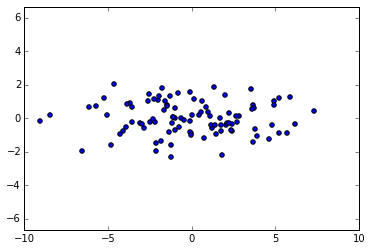

In [6]:
x, y = np.random.multivariate_normal(mean, covariance, 100).T
plt.scatter(x, y)
plt.axis('equal')
plt.show()

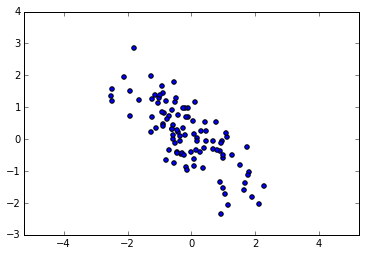

In [7]:
mean = [0,0]
covariance = [[1,-0.75],[-0.75,1]]
x, y = np.random.multivariate_normal(mean, covariance, 100).T
plt.scatter(x, y)
plt.axis('equal')
plt.show()

In [10]:
# Load MNIST
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()
train_image = train_set[0]
train_label = train_set[1]
valid_image = valid_set[0]
valid_label = valid_set[1]
test_image = test_set[0]
test_label = test_set[1]
print "Data loaded"

Data loaded


2


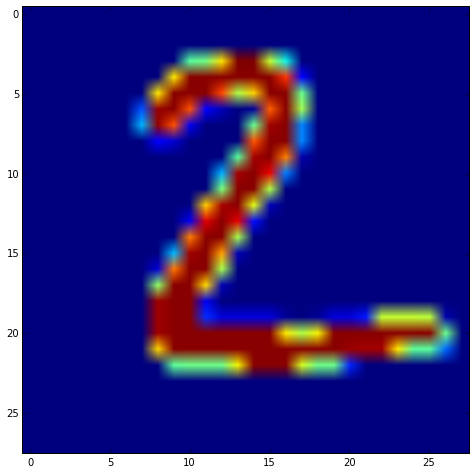

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(np.reshape(test_set[0][1],(28,28)))
print test_set[1][1]

In [15]:
train_image_0 = []
train_image_1 = []
train_image_2 = []
train_image_3 = []
train_image_4 = []
train_image_5 = []
train_image_6 = []
train_image_7 = []
train_image_8 = []
train_image_9 = []
train_label_0 = []
train_label_1 = []
train_label_2 = []
train_label_3 = []
train_label_4 = []
train_label_5 = []
train_label_6 = []
train_label_7 = []
train_label_8 = []
train_label_9 = []

In [16]:
for i in range(len(train_label)):
    if train_label[i] == 0:
        train_image_0.append(train_image[i])
        train_label_0.append(train_label[i])
        continue
    if train_label[i] == 1:
        train_image_1.append(train_image[i])
        train_label_1.append(train_label[i])
        continue
    if train_label[i] == 2:
        train_image_2.append(train_image[i])
        train_label_2.append(train_label[i])
        continue
    if train_label[i] == 3:
        train_image_3.append(train_image[i])
        train_label_3.append(train_label[i])
        continue
    if train_label[i] == 4:
        train_image_4.append(train_image[i])
        train_label_4.append(train_label[i])
        continue
    if train_label[i] == 5:
        train_image_5.append(train_image[i])
        train_label_5.append(train_label[i])
        continue
    if train_label[i] == 6:
        train_image_6.append(train_image[i])
        train_label_6.append(train_label[i])
        continue
    if train_label[i] == 7:
        train_image_7.append(train_image[i])
        train_label_7.append(train_label[i])
        continue
    if train_label[i] == 8:
        train_image_8.append(train_image[i])
        train_label_8.append(train_label[i])
        continue
    if train_label[i] == 9:
        train_image_9.append(train_image[i])
        train_label_9.append(train_label[i])

In [18]:
cPickle.dump(train_image_0, open("train_image_0", "wb"))
cPickle.dump(train_image_1, open("train_image_1", "wb"))
cPickle.dump(train_image_2, open("train_image_2", "wb"))
cPickle.dump(train_image_3, open("train_image_3", "wb"))
cPickle.dump(train_image_4, open("train_image_4", "wb"))
cPickle.dump(train_image_5, open("train_image_5", "wb"))
cPickle.dump(train_image_6, open("train_image_6", "wb"))
cPickle.dump(train_image_7, open("train_image_7", "wb"))
cPickle.dump(train_image_8, open("train_image_8", "wb"))
cPickle.dump(train_image_9, open("train_image_9", "wb"))
cPickle.dump(train_label_0, open("train_label_0", "wb"))
cPickle.dump(train_label_1, open("train_label_1", "wb"))
cPickle.dump(train_label_2, open("train_label_2", "wb"))
cPickle.dump(train_label_3, open("train_label_3", "wb"))
cPickle.dump(train_label_4, open("train_label_4", "wb"))
cPickle.dump(train_label_5, open("train_label_5", "wb"))
cPickle.dump(train_label_6, open("train_label_6", "wb"))
cPickle.dump(train_label_7, open("train_label_7", "wb"))
cPickle.dump(train_label_8, open("train_label_8", "wb"))
cPickle.dump(train_label_9, open("train_label_9", "wb"))

In [17]:
print len(train_label)
print len(train_label_0)
print len(train_label_1)
print len(train_label_2)
print len(train_label_3)
print len(train_label_4)
print len(train_label_5)
print len(train_label_6)
print len(train_label_7)
print len(train_label_8)
print len(train_label_9)

50000
4932
5678
4968
5101
4859
4506
4951
5175
4842
4988


In [53]:
#parameters
c = 0
K = 10

In [19]:
# pi_j
pi_j = np.divide([len(train_label_0), len(train_label_1), len(train_label_2), len(train_label_3), len(train_label_4), len(train_label_5), len(train_label_6), len(train_label_7), len(train_label_8), len(train_label_9)], len(train_label) * 1.0) 

In [20]:
print pi_j

[ 0.09864  0.11356  0.09936  0.10202  0.09718  0.09012  0.09902  0.1035
  0.09684  0.09976]


In [45]:
# fit Gaussian
mu = []
cov = []

In [47]:
# fit Gaussian
mu_tmp = np.mean(train_image_1, axis=0)
cov_tmp = np.zeros([784,784])
for i in range(len(train_label_1)):
    tmp = []
    for j in range(len(train_image_1[i])):
        tmp.append((train_image_1[i] - mu_tmp)[j] * (train_image_1[i] - mu_tmp))
    cov_tmp = np.add(cov_tmp, tmp)
cov_tmp = np.divide(cov_tmp, len(train_label_1))

In [48]:
mu.append(mu_tmp)
cov.append(cov_tmp)

In [49]:
print mu
print cov

[array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.01378748e-04,   2.00381444e-04,   8.23702358e-05,
         0.00000000e+00,   7.12819310e-05,   1.94837281e-04,
         9.26665161e-05,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00

In [50]:
mu_tmp = np.mean(train_image_0, axis=0)
cov_tmp = np.zeros([784,784])
for i in range(len(train_label_0)):
    tmp = []
    for j in range(len(train_image_0[i])):
        tmp.append((train_image_0[i] - mu_tmp)[j] * (train_image_0[i] - mu_tmp))
    cov_tmp = np.add(cov_tmp, tmp)
cov_tmp = np.divide(cov_tmp, len(train_label_0))
cov_tmp = np.add(cov_tmp, c * np.eye(784))
mu.append(mu_tmp)
cov.append(cov_tmp)


mu_tmp = np.mean(train_image_1, axis=0)
cov_tmp = np.zeros([784,784])
for i in range(len(train_label_1)):
    tmp = []
    for j in range(len(train_image_1[i])):
        tmp.append((train_image_1[i] - mu_tmp)[j] * (train_image_1[i] - mu_tmp))
    cov_tmp = np.add(cov_tmp, tmp)
cov_tmp = np.divide(cov_tmp, len(train_label_1))
cov_tmp = np.add(cov_tmp, c * np.eye(784))
mu.append(mu_tmp)
cov.append(cov_tmp)

mu_tmp = np.mean(train_image_2, axis=0)
cov_tmp = np.zeros([784,784])
for i in range(len(train_label_2)):
    tmp = []
    for j in range(len(train_image_2[i])):
        tmp.append((train_image_2[i] - mu_tmp)[j] * (train_image_2[i] - mu_tmp))
    cov_tmp = np.add(cov_tmp, tmp)
cov_tmp = np.divide(cov_tmp, len(train_label_2))
cov_tmp = np.add(cov_tmp, c * np.eye(784))
mu.append(mu_tmp)
cov.append(cov_tmp)

mu_tmp = np.mean(train_image_3, axis=0)
cov_tmp = np.zeros([784,784])
for i in range(len(train_label_3)):
    tmp = []
    for j in range(len(train_image_3[i])):
        tmp.append((train_image_3[i] - mu_tmp)[j] * (train_image_3[i] - mu_tmp))
    cov_tmp = np.add(cov_tmp, tmp)
cov_tmp = np.divide(cov_tmp, len(train_label_3))
cov_tmp = np.add(cov_tmp, c * np.eye(784))
mu.append(mu_tmp)
cov.append(cov_tmp)

mu_tmp = np.mean(train_image_4, axis=0)
cov_tmp = np.zeros([784,784])
for i in range(len(train_label_4)):
    tmp = []
    for j in range(len(train_image_4[i])):
        tmp.append((train_image_4[i] - mu_tmp)[j] * (train_image_4[i] - mu_tmp))
    cov_tmp = np.add(cov_tmp, tmp)
cov_tmp = np.divide(cov_tmp, len(train_label_4))
cov_tmp = np.add(cov_tmp, c * np.eye(784))
mu.append(mu_tmp)
cov.append(cov_tmp)

mu_tmp = np.mean(train_image_5, axis=0)
cov_tmp = np.zeros([784,784])
for i in range(len(train_label_5)):
    tmp = []
    for j in range(len(train_image_5[i])):
        tmp.append((train_image_5[i] - mu_tmp)[j] * (train_image_5[i] - mu_tmp))
    cov_tmp = np.add(cov_tmp, tmp)
cov_tmp = np.divide(cov_tmp, len(train_label_5))
cov_tmp = np.add(cov_tmp, c * np.eye(784))
mu.append(mu_tmp)
cov.append(cov_tmp)

mu_tmp = np.mean(train_image_6, axis=0)
cov_tmp = np.zeros([784,784])
for i in range(len(train_label_6)):
    tmp = []
    for j in range(len(train_image_6[i])):
        tmp.append((train_image_6[i] - mu_tmp)[j] * (train_image_6[i] - mu_tmp))
    cov_tmp = np.add(cov_tmp, tmp)
cov_tmp = np.divide(cov_tmp, len(train_label_6))
cov_tmp = np.add(cov_tmp, c * np.eye(784))
mu.append(mu_tmp)
cov.append(cov_tmp)

mu_tmp = np.mean(train_image_7, axis=0)
cov_tmp = np.zeros([784,784])
for i in range(len(train_label_7)):
    tmp = []
    for j in range(len(train_image_7[i])):
        tmp.append((train_image_7[i] - mu_tmp)[j] * (train_image_7[i] - mu_tmp))
    cov_tmp = np.add(cov_tmp, tmp)
cov_tmp = np.divide(cov_tmp, len(train_label_7))
cov_tmp = np.add(cov_tmp, c * np.eye(784))
mu.append(mu_tmp)
cov.append(cov_tmp)

mu_tmp = np.mean(train_image_8, axis=0)
cov_tmp = np.zeros([784,784])
for i in range(len(train_label_8)):
    tmp = []
    for j in range(len(train_image_8[i])):
        tmp.append((train_image_8[i] - mu_tmp)[j] * (train_image_8[i] - mu_tmp))
    cov_tmp = np.add(cov_tmp, tmp)
cov_tmp = np.divide(cov_tmp, len(train_label_8))
cov_tmp = np.add(cov_tmp, c * np.eye(784))
mu.append(mu_tmp)
cov.append(cov_tmp)

mu_tmp = np.mean(train_image_9, axis=0)
cov_tmp = np.zeros([784,784])
for i in range(len(train_label_9)):
    tmp = []
    for j in range(len(train_image_9[i])):
        tmp.append((train_image_9[i] - mu_tmp)[j] * (train_image_9[i] - mu_tmp))
    cov_tmp = np.add(cov_tmp, tmp)
cov_tmp = np.divide(cov_tmp, len(train_label_9))
cov_tmp = np.add(cov_tmp, c * np.eye(784))
mu.append(mu_tmp)
cov.append(cov_tmp)

In [75]:
cPickle.dump(pi_j, open("pi.pkl","wb"))

In [66]:
cPickle.dump(mu, open("mu.pkl","wb"))
cPickle.dump(cov, open("cov.pkl","wb"))

In [51]:
print len(mu)
print len(cov)

10
10


In [78]:
valid_error = []
#for c in [-10,-5,-1,0,0.1,0.5,0.8,1,5,10,20,100]:
for c in [0.3, 0.4, 0.45, 0.5,0.55,0.6]:
    print "processing c = ", c
    mu = cPickle.load(open("mu.pkl","rb"))
    cov = cPickle.load(open("cov.pkl","rb"))
    for i in range(len(cov)):
        cov[i] = np.add(cov[i], c * np.eye(784))
    inv_cov = []
    for i in range(len(cov)):
        inv_cov.append(np.linalg.pinv(cov[i]))
    cov_norm = []
    for i in range(len(cov)):
        cov_norm.append(np.linalg.norm(cov[i]))
    correct_classified = 0
    for i in range(len(valid_label)):
        max_prob = -1 * float('Inf')
        pred = -1
        for j in range(K):
            tmp = math.log(pi_j[j]) - 0.5 * math.log(cov_norm[j]) - 0.5 * np.dot(valid_image[i] - mu[j], np.dot(inv_cov[j], valid_image[i] - mu[j]))
            if tmp > max_prob:
                max_prob = tmp
                pred = j
        if pred == valid_label[i]:
            correct_classified += 1
    valid_error.append(1 - correct_classified * 1.0 / len(valid_label))

processing c =  0.3
processing c =  0.4
processing c =  0.45
processing c =  0.5
processing c =  0.55
processing c =  0.6


In [79]:
[0.3, 0.4, 0.45, 0.5,0.55,0.6]
print valid_error

[0.03410000000000002, 0.03420000000000001, 0.03469999999999995, 0.03539999999999999, 0.035800000000000054, 0.0363]


In [77]:
[-10,-5,-1,0,0.1,0.5,0.8,1,5,10,20,100]
print valid_error

[0.9308, 0.9166, 0.9137, 0.5074000000000001, 0.0373, 0.03539999999999999, 0.03920000000000001, 0.04139999999999999, 0.08330000000000004, 0.11599999999999999, 0.16080000000000005, 0.4423]


In [68]:
inv_cov = []
for i in range(len(cov)):
    inv_cov.append(np.linalg.pinv(cov[i]))
cov_norm = []
for i in range(len(cov)):
    cov_norm.append(np.linalg.norm(cov[i]))

In [72]:
print cov_norm

[12.695747858806063, 8.9051805807971718, 9.9022600037040949, 9.2984948262157605, 8.4886512885316705, 10.880635420559701, 10.334385126348336, 9.0214652940865978, 8.9272273254482712, 9.0168056223052382]


In [83]:
# test error
c = 0.3
mu = cPickle.load(open("mu.pkl","rb"))
cov = cPickle.load(open("cov.pkl","rb"))
for i in range(len(cov)):
    cov[i] = np.add(cov[i], c * np.eye(784))
inv_cov = []
for i in range(len(cov)):
    inv_cov.append(np.linalg.pinv(cov[i]))
cov_norm = []
for i in range(len(cov)):
    cov_norm.append(np.linalg.norm(cov[i]))
correct_classified = 0
wrong_index = []
for i in range(len(test_label)):
    if i % 1000 == 0:
        print i
    max_prob = -1 * float('Inf')
    pred = -1
    for j in range(K):
        tmp = math.log(pi_j[j]) - 0.5 * math.log(cov_norm[j]) - 0.5 * np.dot(test_image[i] - mu[j], np.dot(inv_cov[j], test_image[i] - mu[j]))
        if tmp > max_prob:
            max_prob = tmp
            pred = j
    if pred == test_label[i]:
        correct_classified += 1
    else:
        wrong_index.append(i)
print "test error: ", 1 - correct_classified * 1.0 / len(test_label)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
test error:  0.041


In [85]:
print wrong_index

[33, 73, 80, 151, 217, 241, 247, 259, 320, 321, 324, 333, 340, 349, 352, 359, 444, 445, 448, 464, 479, 495, 511, 515, 551, 578, 591, 613, 619, 628, 659, 684, 689, 691, 717, 720, 726, 728, 738, 740, 741, 791, 797, 829, 924, 938, 939, 944, 947, 950, 956, 965, 976, 982, 1012, 1014, 1032, 1039, 1055, 1062, 1101, 1107, 1112, 1114, 1119, 1153, 1173, 1181, 1182, 1192, 1194, 1204, 1206, 1226, 1232, 1247, 1260, 1270, 1283, 1319, 1326, 1356, 1364, 1393, 1403, 1496, 1500, 1514, 1522, 1525, 1527, 1530, 1549, 1553, 1559, 1581, 1591, 1621, 1681, 1709, 1717, 1718, 1721, 1737, 1754, 1790, 1800, 1839, 1868, 1878, 1883, 1901, 1952, 1955, 1982, 1984, 2016, 2024, 2035, 2043, 2044, 2053, 2070, 2098, 2107, 2109, 2110, 2118, 2129, 2130, 2135, 2138, 2182, 2185, 2186, 2189, 2266, 2272, 2293, 2299, 2325, 2358, 2387, 2393, 2395, 2397, 2406, 2414, 2422, 2454, 2488, 2573, 2578, 2607, 2610, 2631, 2648, 2654, 2705, 2713, 2730, 2743, 2758, 2760, 2780, 2810, 2812, 2863, 2896, 2927, 2939, 2953, 2970, 2995, 3005, 3060, 

In [119]:
a = [-769.75931441372063, -798.36685265577842, -761.91870520366103, -762.6544958258072, -784.53133224551163, -766.91974858063395, -755.74868211771854, -798.14248940715891, -773.72898069351129, -793.73300463931457]
for i in range(len(a)):
    a[i] += 790
    a[i] = math.exp(a[i])
a = np.divide(a, np.sum(a))

In [120]:
print a

[  8.20185321e-07   3.08898638e-19   2.08470836e-03   9.98839020e-04
   3.15141909e-13   1.40320061e-05   9.96901585e-01   3.86594538e-19
   1.54848796e-08   3.17885425e-17]


label:  7
[-780.34881038309913, -803.46880376338459, -774.16474420839563, -769.02902520167731, -754.33148818041786, -765.0970147128196, -790.18406508158569, -748.19650896211692, -766.59867197575966, -746.27701646926789]
label:  8
[-829.61169188742599, -873.27418650806658, -775.2699506332184, -787.53024618117263, -798.81267921514871, -797.34812273701516, -801.61263268261496, -823.04217677769202, -785.80915076286306, -809.42434857462047]
label:  9
[-760.37206515207504, -812.54062751719675, -768.80943755124338, -764.63823569389206, -776.23786412068091, -762.02727944159494, -788.60305121542774, -772.39295193670159, -766.0300895155433, -764.73655403918099]
label:  5
[-773.42190767490945, -849.13878347587399, -778.97484088958652, -758.49589809171948, -823.09378833670326, -760.20217839554596, -798.93261711980949, -815.13549153266797, -784.51481153812892, -813.34332292192028]
label:  5
[-769.75931441372063, -798.36685265577842, -761.91870520366103, -762.6544958258072, -784.53133224551163, -766

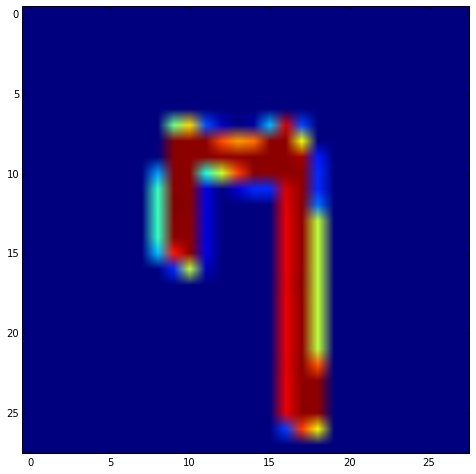

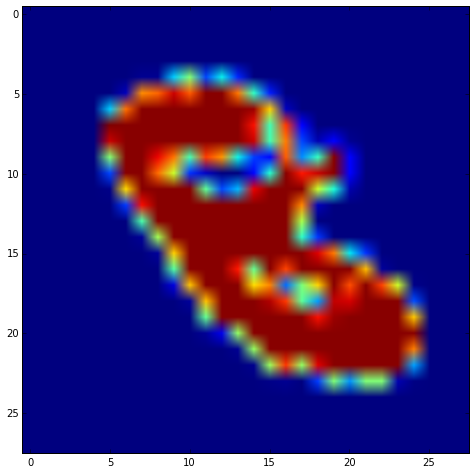

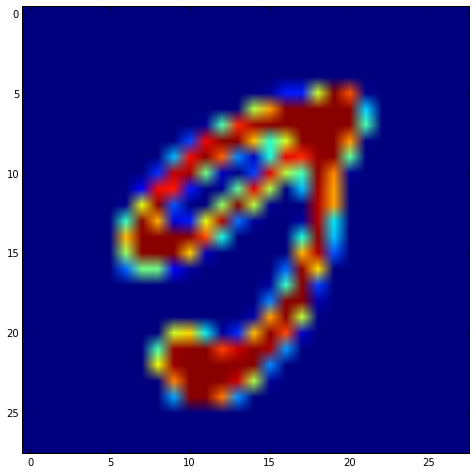

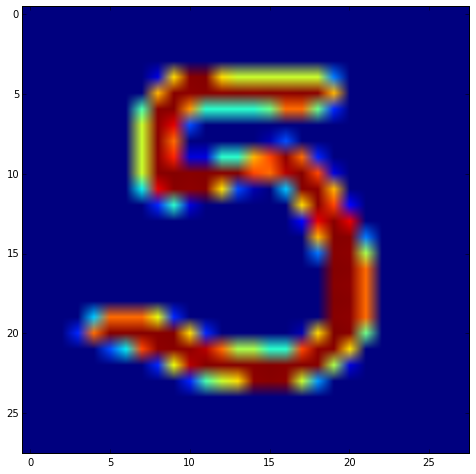

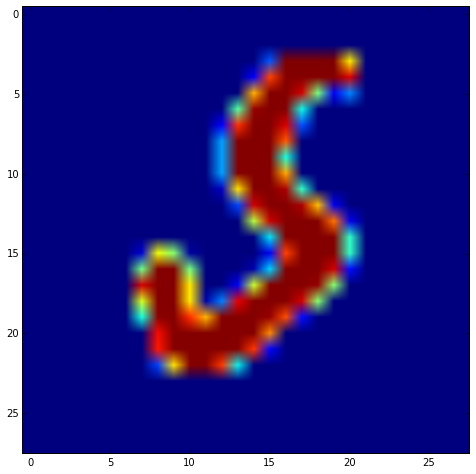

In [88]:
wrong_index_5 = [80,1101,2648,5922,9982]
for i in wrong_index_5:
    print "label: ", test_label[i]
    plt.figure(figsize=(8,8))
    plt.imshow(np.reshape(test_image[i], (28,28)))
    post_prob = []
    for j in range(K):
        tmp = math.log(pi_j[j]) - 784 / 2 * math.log(2 * 3.1415926) - 0.5 * math.log(cov_norm[j]) - 0.5 * np.dot(test_image[i] - mu[j], np.dot(inv_cov[j], test_image[i] - mu[j]))
        post_prob.append(tmp)
        #post_prob.append(math.exp(tmp))
    #post_prob = np.divide(post_prob, np.sum(post_prob))
    print post_prob

In [ ]:
# problem 6

In [ ]:
c = 0.3
mu = cPickle.load(open("mu.pkl","rb"))
cov = cPickle.load(open("cov.pkl","rb"))
for i in range(len(cov)):
    cov[i] = np.add(cov[i], c * np.eye(784))
inv_cov = []
for i in range(len(cov)):
    inv_cov.append(np.linalg.pinv(cov[i]))
cov_norm = []
for i in range(len(cov)):
    cov_norm.append(np.linalg.norm(cov[i]))

In [97]:
diff = []
for i in range(len(valid_label)):
    if i % 1000 == 0:
        print i
    prob = []
    for j in range(K):
        tmp = math.log(pi_j[j]) - 0.5 * math.log(cov_norm[j]) - 0.5 * np.dot(valid_image[i] - mu[j], np.dot(inv_cov[j], valid_image[i] - mu[j]))
        prob.append(tmp)
    a = np.max(prob)
    index = np.argmax(prob)
    prob[index] = -1 * float('Inf')
    b = np.max(prob)
    diff.append(a - b)
    if (a - b) < 0:
        print "error!"

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [101]:
print diff[:10]

[8.9363039310554164, 15.431800044988726, 16.756479941871998, 11.776434206825613, 17.092124418337139, 5.1608095613462872, 14.468304410671514, 7.2698826971484074, 15.193801018641928, 8.5622447820569612]


In [103]:
diff_sort = np.sort(diff)

In [106]:
print diff_sort[:10]

[ 0.01791855  0.02008678  0.02283235  0.02583611  0.03450989  0.03487493
  0.03951993  0.05283615  0.05489715  0.05637186]


In [105]:
threshold = diff_sort[ int(0.1* len(diff_sort))]
print threshold

4.52744840087


In [108]:
abstain = []
error = []
for f in [0.05, 0.1, 0.15, 0.2, 0.3]:
#for f in [0.05]:
    threshold = diff_sort[int(f * len(diff_sort))]
    print "f = ", f, " threshold = ", threshold
    correct_classified = 0
    abstain_count = 0
    for i in range(len(test_label)):
        prob = []
        for j in range(K):
            tmp = math.log(pi_j[j]) - 0.5 * math.log(cov_norm[j]) - 0.5 * np.dot(test_image[i] - mu[j], np.dot(inv_cov[j], test_image[i] - mu[j]))
            prob.append(tmp)
        a = np.max(prob)
        index = np.argmax(prob)
        prob[index] = -1 * float('Inf')
        b = np.max(prob)
        if (a-b) < threshold:
            pred = -1
            abstain_count += 1
        else:
            pred = index
        if pred == test_label[i]:
            correct_classified += 1
    abstain.append(abstain_count)
    error.append(1 - correct_classified * 1.0 / (len(test_label) - abstain_count))
    print "test error: ", 1 - correct_classified * 1.0 / (len(test_label) - abstain_count)
    print "abstain num: ", abstain_count    

f =  0.05  threshold =  2.55661921881
test error:  0.0197758037225
abstain num:  544
f =  0.1  threshold =  4.52744840087
test error:  0.0112760969074
abstain num:  1043
f =  0.15  threshold =  6.14130924944
test error:  0.00745121230041
abstain num:  1545
f =  0.2  threshold =  7.41833954266
test error:  0.0047714716223
abstain num:  2036
f =  0.3  threshold =  9.69127418559
test error:  0.0027560197273
abstain num:  3106


In [ ]:
plt.plot([0.05, 0.1, 0.15, 0.2, 0.3], error)
plt.title("test error rate versus f")

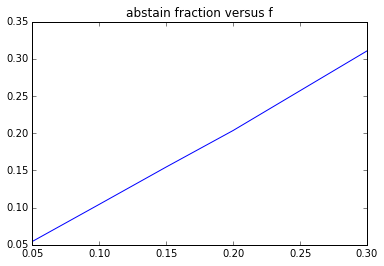

In [110]:
for i in range(len(abstain)):
    abstain[i] = abstain[i] * 1.0 / len(test_label)
plt.plot([0.05, 0.1, 0.15, 0.2, 0.3], abstain)
plt.title("abstain fraction versus f")